# Display Original Dataset Statistics

/pfs/data5/home/kit/stud/uwqvo/hotel-id-nns/data/dataset


,chain_id,hotel_id
path,,
85/8000d59f6a3d765f.jpg,85,24607
6/8000febe81817f7f.jpg,6,25389
3/80053befc2d42fba.jpg,3,672
5/8007fa0a8fe89f9d.jpg,5,63866
0/800a4a6b6f6d2df6.jpg,0,12036
...,...,...
83/ffff8082ec219892.jpg,83,20544
82/ffff8200e50cc0f1.jpg,82,51053
83/ffff84129981a4a4.jpg,83,42842


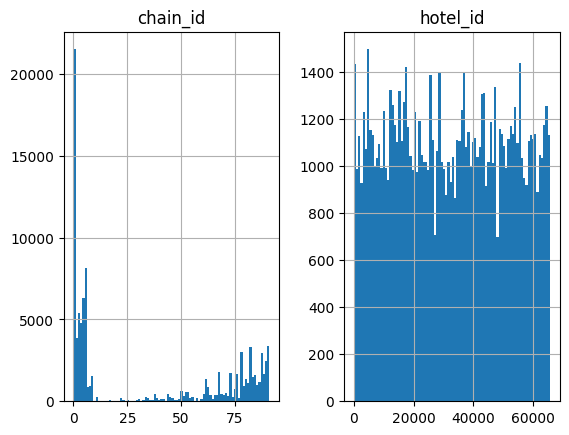

In [2]:
import pandas as pd
import os
from pathlib import Path

dataset_dir = Path(os.path.abspath('__file__')).parent.parent.parent / "data/dataset"
print(dataset_dir)
assert dataset_dir.exists()

df = pd.read_csv(dataset_dir / 'train.csv')
df.pop('timestamp')
df = df.rename(columns={'chain': "chain_id", "image": "path"})

df['path'] = df.chain_id.astype(str).str.cat(df.path, sep="/")
df = df.set_index("path")
df.hist(bins=88)
df

## Chain ID Mapping

In [3]:
# map chain id
chain_id_mapping = pd.Series(df.reset_index().chain_id.sort_values().unique(), name='chain_id').to_frame().reset_index().set_index('chain_id')
display(chain_id_mapping)
df.chain_id = df.chain_id.map(lambda c: chain_id_mapping.loc[c, 'index'])
chain_id_mapping.to_csv(dataset_dir / 'chain_id_mapping.csv')
df

,index
chain_id,
0,0
1,1
2,2
3,3
4,4
...,...
87,83
88,84
89,85


,chain_id,hotel_id
path,,
85/8000d59f6a3d765f.jpg,81,24607
6/8000febe81817f7f.jpg,6,25389
3/80053befc2d42fba.jpg,3,672
5/8007fa0a8fe89f9d.jpg,5,63866
0/800a4a6b6f6d2df6.jpg,0,12036
...,...,...
83/ffff8082ec219892.jpg,79,20544
82/ffff8200e50cc0f1.jpg,78,51053
83/ffff84129981a4a4.jpg,79,42842


# Hotel ID mapping

In [4]:
# map hotel id
hotel_id_mapping = pd.Series(df.reset_index().hotel_id.sort_values().unique(), name='hotel_id').to_frame().reset_index().set_index('hotel_id')
display(hotel_id_mapping)
df.hotel_id = df.hotel_id.map(lambda c: hotel_id_mapping.loc[c, 'index'])
hotel_id_mapping.to_csv(dataset_dir / "hotel_id_mapping.csv")
df

,index
hotel_id,
12,0
24,1
44,2
45,3
49,4
...,...
65478,7765
65490,7766
65497,7767


,chain_id,hotel_id
path,,
85/8000d59f6a3d765f.jpg,81,2946
6/8000febe81817f7f.jpg,6,3030
3/80053befc2d42fba.jpg,3,91
5/8007fa0a8fe89f9d.jpg,5,7546
0/800a4a6b6f6d2df6.jpg,0,1405
...,...,...
83/ffff8082ec219892.jpg,79,2489
82/ffff8200e50cc0f1.jpg,78,6031
83/ffff84129981a4a4.jpg,79,5052


# Generate Train-Val-Test CSV Splits

92678
3252
1626


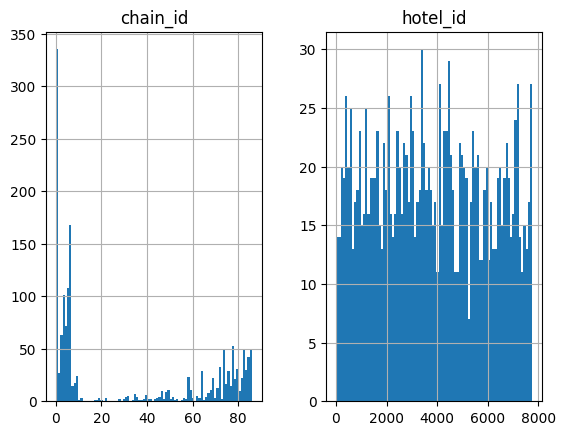

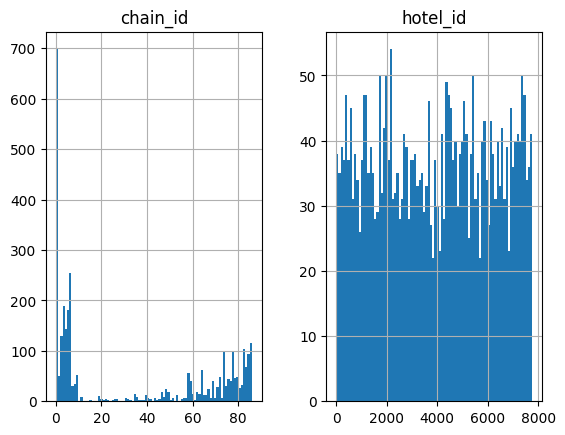

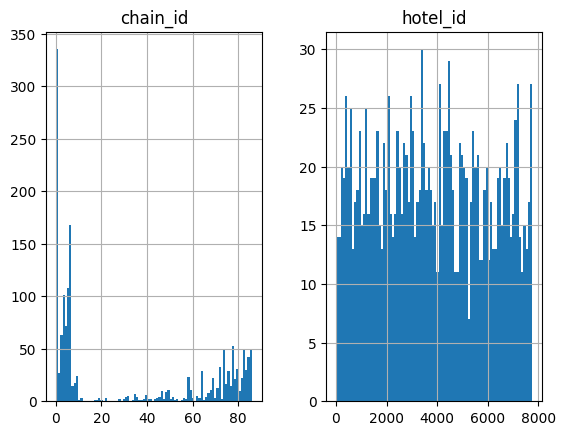

In [5]:
import numpy as np

df_shuffled = df.sample(frac=1)
train, val, test = np.split(df_shuffled, [int(0.95*len(df_shuffled)), int((0.95 + 0.05 * 2 / 3)*len(df_shuffled))])
test.hist(bins=88)
val.hist(bins=88)
test.hist(bins=88)
print(len(train))
print(len(val))
print(len(test))

train.to_csv(dataset_dir / "hotel_train_chain.csv")
val.to_csv(dataset_dir / "hotel_val_chain.csv")
test.to_csv(dataset_dir / "hotel_test_chain.csv")

## Compute Chain ID and Hotel ID (inverse) weights

In [6]:
display(df.max())
df_chain_id_weights = 1 / df.chain_id.value_counts()
df_chain_id_weights = df_chain_id_weights / df_chain_id_weights.sum()
df_chain_id_weights.name = 'weights'
df_chain_id_weights.to_csv(dataset_dir / 'chain_id_weights.csv')

df_hotel_id_weights = 1 / df.hotel_id.value_counts()
df_hotel_id_weights = df_hotel_id_weights / df_hotel_id_weights.sum()
df_hotel_id_weights.name = 'weights'
df_hotel_id_weights.to_csv(dataset_dir / 'hotel_id_weights.csv')

chain_id      87
hotel_id    7769
dtype: int64